# Test eksamenssæt

### Mat 1b eksamen maj 2024

In [ ]:
import sympy as sp

sp.init_printing()
from dtumathtools import *
from sympy import plot
from sympy.plotting import plot3d_parametric_line

In [ ]:
def inner(x1: sp.Matrix, x2: sp.Matrix):
    """
    Computes the inner product of two vectors of same length.
    """

    return x1.dot(x2, conjugate_convention="right")


sp.MutableDenseMatrix.inner = inner
sp.ImmutableDenseMatrix.inner = inner

# Opgave 1

In [ ]:
x, y = sp.symbols("x y")

dfdx = 6 * x - 6 * y
dfdy = 6 * y**2 - 6 * x
display(dfdx, dfdy)

## a)

Vi sætter ligningerne for $f$'s partielt afledte lig $0$ for at beregne dets stationære punkter:

In [ ]:
eq1 = sp.Eq(dfdx, 0)
eq2 = sp.Eq(dfdy, 0)
Stationære_punkter = sp.nonlinsolve([eq1, eq2], [x, y])  # husk variable og ligninger
Stationære_punkter

## b)

For at beregne de 2. ordens partielt afledte af $f$ differentierer vi de partielt afledte af $f$ igen:

In [ ]:
dfdx2 = sp.diff(dfdx, x)
dfdy2 = sp.diff(dfdy, y)
display(dfdx2, dfdy2)

For at bestemme hessematricen for $f$ mangler vi nu blot at beregne $\frac{df}{dxy}$:

In [ ]:
dfdxy = sp.diff(dfdx, y)
display(dfdxy)

H_f = sp.Matrix([[dfdx2, dfdxy], [dfdxy, dfdy2]])
display(H_f)

Herefter kan vi nu evaluere hessematricen for hver af de fundne stationære punkter:

In [ ]:
[{(x_0, y_0): H_f.subs([(x, x_0), (y, y_0)])} for (x_0, y_0) in Stationære_punkter]

Derefter udregner vi egenværdierne for hver af hessematricerne. Dette vil fortælle os om punkternes natur:

In [ ]:
Hesse_matricer = [H_f.subs([(x, x0), (y, y0)]) for x0, y0 in Stationære_punkter]
egenværdi = [h.eigenvals() for h in Hesse_matricer]

display(*zip(Stationære_punkter, egenværdi))
# ((første stationære punkt), {egenværdi : grad}),

Hermed kan vi aflæse, at $(0,0)$ er et saddelpunkt da de to egenværdier har forskelligt fortegn. Punktet $(1,1)$ er et lokalt minimum da begge egenværdier er positive.

## c)

For at taylor approksimere $f$ skal vi bruge $f$'s 1. orden partielt afledte samt dets 2. orden partielt afledte og $f$'s værdi i udviklingspunktet. Alt dette er givet, så vi begynder med at skrive de ting ned, vi kender og som vi skal bruge:

In [ ]:
x0 = 0  # Udviklingspunkt x koordinat
y0 = 0  # Udviklingspunkt y koordinat
x, y = sp.symbols("x y")

f = 1  # f givet af opgaven
dfx = 6 * x0 - 6 * y0  # 1. orden differentieret for x
dfy = 6 * y0**2 - 6 * x0  # 1. orden differentieret for y
ddfxx = 6  # 2. orden differentieret for x
ddfyy = 12 * y0  # 2. orden differentieret for y
ddfxy = -6  # 2. orden differentieret for x og y

# Formlen for taylor udvikling i to variable:
P2 = f + dfx * x + dfy * y + 1 / 2 * ddfxx * x**2 + ddfxy * x * y + 1 / 2 * ddfyy * y**2
display(P2)

OBS: Vi bruger Taylors grænseformel for approksimering i to variable:
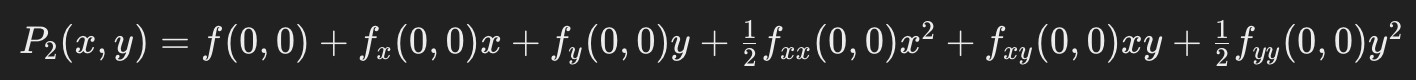

Hermed har vi taylor approksimeret $f$ i udviklingspunktet $(0,0)$, og dermed udregnet taylor polynomiet af anden grad.

# Opgave 2

## a)

Vi begynder med at definere den stykvise funktion:

In [ ]:
f = sp.Piecewise(
    (sp.sin(x) / x, x != 0),
    (1, x == 0),
)
display(f)


x0 = 0  # Udviklingspunktet

Herefter kan vi taylor udvikle polynomiet i udviklingspunktet $x=0$ op til tredje grad:

In [ ]:
P3 = sp.series(f, x, x0, 4).removeO()
display(P3)

In [ ]:
plot(sp.sin(x) / x, (x, -20, 20), ylim=(-0.5, 1.5))

## b)

Hvis vi kigger på $\frac{x^2}{6}$, så vil dette led bevæge sig uendeligt langt ned mod $0$, såfremt $x \rightarrow 0$. Dermed vil $1$ stå tilbage til censtre for minustegnet, og 0 vil forsøge at blive fratrukket, hvilket efterlader $1$. Hermed er det vist at $lim_{x \rightarrow 0}\frac{\sin(x)}{x}=1$ 

## c)

Vi ved at $sin(x)$ er kontinuer og at $x$ ligeledes er kontinuer. Dermed er de to funktioner hver for sig kontinuere, og dermed er $f$ ligeledes kontinuer her i alle tilfælde for $x\neq 0$. Næste betingelse er, at funktionen i $0$ er lig grænseværdien i $0$.

# Opgave 3

## a)

Det observeres, at ved definitionen af $t$ som $t=2$, vil $C_t$ være en cirkulær matrice. Dermed er $C_t$ i dette tilfælde pr. definition også en normal matrice. Vi kan dobbelttjekke dette ved at undersøge, om $C_t$ opfylder $A^*\cdot A = A\cdot A^*$:

In [ ]:
C_t = sp.Matrix(
    [
        [1, 2, 3, 4],
        [4, 1, 2, 3],
        [3, 4, 1, 2],
        [2, 3, 4, 1],
    ]
)

C_t.H * C_t == C_t * C_t.H

## b)

Vi begynder med at definere $A$ såvels som $v_1$ og $v_2$:

In [ ]:
A = sp.Matrix(
    [
        [1, 2, 3, 4],
        [4, 1, 2, 3],
        [3, 4, 1, 2],
        [2, 3, 4, 1],
    ]
)

v_1 = sp.Matrix([1, 1, 1, 1])
v_2 = sp.Matrix([1, sp.I, -1, -sp.I])

display(A, v_1, v_2)

Herefter kan vi beregne $Av=\lambda v$ for at bestemme egenværdierne

In [ ]:
Av1 = A * v_1

Av1

Hermed kan vi observere, at $10$ er en skalar af $v_1$, og dermed er $\lambda_1 = 10$. 

## c)

Vi foretager samme operation som i b):

In [ ]:
Av2 = A * v_2
Av2

For at endegyldigt bestemme $\lambda_2$ evaluerer vi denne skalar for hvert komponent af $v_2$:

In [ ]:
lambda_2_checks = [
    (Av2[i] / v_2[i]).simplify() for i in range(4)
]  # Tjekker Av2 for hvert komponent i v_2
lambda_2_checks

Her får vi det første komponent i $v_2$ sammen med $2i(-1+i)$. Vi kan simplificere dette udtryk:

$2i(-1+i)$

$2i\cdot (-1)+2i\cdot i$

$-2i + 2i^2$

$-2i + 2\cdot -1$

$-2i - 2$

Hermed får vi det samme udtryk, og dermed er $\lambda_2 = -2i - 2$.

Vi kan bekræfte dette via SymPy:

In [ ]:
A.eigenvects()

## KAN GØRES RIGTIG SMARTERE SÅDAN HER

For at beregne egenværdierne bruger vi følgende regel: $Av = \lambda v$. Vi opsætter to ligninger for hver af vores egenvektorer, som løser for dette:

In [ ]:
lambda_1, lambda_2 = sp.symbols("lambda_1 lambda_2")

eq_eigenval1 = sp.Eq(A * v_1, lambda_1 * v_1)
eq_eigenval2 = sp.Eq(A * v_2, lambda_2 * v_2)

Disse to ligninger kan vi nu løse. Vi begynder med at udregne $\lambda_1$:

In [ ]:
sp.solve(eq_eigenval1, lambda_1)

Herefter kan vi gøre det samme for $\lambda_2$:

In [ ]:
sp.solve(eq_eigenval2, lambda_2)

## d)

For at bestemme hvorvidt $v_1$ og $v_2$ er ortogonale, skal vi beregne deres indreprodukt.

In [ ]:
v_1.inner(v_2)

Eftersom prikproduktet af $v_1$ og $v_2$ er $0$, kan vi konkludere at $v_1$ og $v_2$ er ortogonale på hinanden.

## e)

Vi beregner normen af $v_1$ og $v_2$:

In [ ]:
v_1_norm = v_1.norm()
v_2_norm = v_2.norm()

display(v_1_norm, v_2_norm)

Eftersom længden af begge vektorer er $2$, og dermed forskellig fra $1$, er de altså ikke ortonormale, selvom de er ortogonale på hinanden.

# Opgave 4

In [ ]:
x1, x2 = sp.symbols("x1 x2")


def q(x1, x2):
    return 2 * x1**2 - 2 * x1 * x2 + 2 * x2**2 - 4 * x1 + 2 * x2 + 2

## a)

Vi opstiller henholdsvis $A$,  $b$ og $c$. Vi begynder med at dele leddene op ud fra den kvadratiske form, så vi ved hvad matricerne skal bestå af:

$A = 2x_1^2 - 2x_1x_2 + 2x_2^2$

$b = -4x_1 +2x_2$

$c = 2$

Herefter kan vi opstille matricerne såven som $c$:

In [ ]:
A = sp.Matrix(
    [
        [2, -1],
        [-1, 2],
    ]
)

b = sp.Matrix([-4, 2])
c = sp.Matrix([2])
x = sp.Matrix([x1, x2])

display(A, b, c)

### OBS: Her kan ligeledes benytte Janus' kode under spektralsætningen.ipynb. Den er virkelig godt skrevet, og kan give matriceformerne ud fra kvadratiske former. Der er fremgangsmetoden og skabelonen herfor også givet.

## b)

Vi skal beregne en matrix $Q$ som diagonaliserer $A$. For at gøre dette, skal beregne en $Q$ som består er ortogonal.

In [ ]:
def eigenvects_flat(A: sp.Matrix) -> list[sp.Matrix]:
    return [ev for evs in A.eigenvects(simplify=True) for ev in evs[2]]


sp.MutableDenseMatrix.eigenvects_flat = eigenvects_flat
sp.ImmutableDenseMatrix.eigenvects_flat = eigenvects_flat


def findQ(A: sp.Matrix) -> sp.Matrix:
    V = sp.Matrix.hstack(*A.eigenvects_flat())
    Q = sp.Matrix.hstack(*sp.GramSchmidt(V.columnspace(), orthonormal=True))
    return Q, V  # Q er så V normaliseret så den der ortonormal


Q = findQ(A)  # Printer Q
Q

Denne Q anvendes nu til at reducere den kvadratiske form q således at den ikke indeholder blandede led: Eksempel 2.8.3 i noterne

In [ ]:
q = x.T * Q.T * A * Q * x + x.T * Q.T * b + c
sp.simplify(q)

Hermed er $A$ diagonaliseret, og indeholder ingen blandede led. $Q$ er hermed ligeledes en ortogonal matrix, og er dermed beregnet.

### OBS: Her kan man også blot udregne egenværdierne og egenvektorerne for $A$, og derefter normalisere dem. Såfremt egenvektorerne er ortogonale, hvilket de er, kan de blot normaliseret så de får længden $1$. Hermed vil de også være ortonormale, og de vil udgøre matricen $Q$.

## c)

Med den reducerede Q skal der nu findes værdier for $\alpha, \beta, \gamma$ og $\delta$. Dette kan blot gøres ved kvadratkomplettering

dont really know how to do 

Hermed har vi beregnet de reelle tal for $\alpha = 1, \beta = 3, \gamma = \frac{\sqrt(2)}{2}$ og $\delta = -\frac{3 \sqrt(2)}{2}$.

## d)

Vi skal invertere transformationen for at finde frem til koordinaterne i $(x_1, x_2)$ koordinater. Dette gøres således:

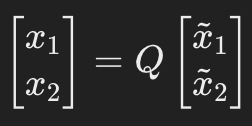

Vi kan indsætte $\gamma$ og $\delta$ i udtrykket for $\tilde{x_1}$ og $\tilde{x_2}$ for at finde de oprindelige koordinater:

### OBS: unfinished, ved ikke hvad FUCK der foregår sut en pik

# Opgave 5

## a)

For at plotte området $\Omega$ definerer vi først $r(u,v,w)$:

In [ ]:
u, v, w = sp.symbols("u v w")

# u = sp.intervals(0, 1)
# v = sp.intervals(0, 1)
# w = sp.intervals(0, sp.pi / 2)

# Fix w at pi/4 for a specific visualization
# w_val = sp.pi / 4

omega = sp.Matrix(
    [
        [v * u**2 * sp.cos(w)],
        [v * u**2 * sp.sin(w)],
        [u],
    ]
)

x = omega[0]
y = omega[1]
z = omega[2]

omega

In [ ]:
# Plotting the parametric curve
# Here we choose the ranges for u, v, and w based on your definition
plot = plot3d_parametric_line(
    x,
    y,
    z,
    (u, 0, 1),  # Range for u
    (v, 0, 1),  # Range for v
    (w, 0, sp.pi / 2),  # Range for w
)

# Display the plot
plot.show()